# Stack Overflow

## Introduction 

In the second part of this assignment, we will create and analyze time series of creation dates of Stack Overflow questions. This assignment is to be completed **INDIVIDUALLY** and it is due on **February 23 at 3pm**.

In [1]:
print("your firstname your lastname")
print("Monil Jhaveri")
print("BU ID U29685415")

your firstname your lastname
Monil Jhaveri
BU ID U29685415


Let's create some time series from the data. You may choose to analyze either users or tags. To analyze users, take the top 100 users with the most question posts. For each user, your time series will be the number of questions posted by that user at some frequency. To analyze tags, take the top 100 most popular question tags. For each tag, your time series will be the number of questions with that tag at some frequency. You may choose to sample your data each week, each month, on a certain day of the week or at certain hours in a day depending on what trend you are hoping to find in the data. For example, if you choose to analyze tags and sample during different hours of the day, your hypothesis could be that languages (e.g. Javascript) that are used more in industry will have more questions posted during work hours, whereas languages (e.g. Python) that are taught in academia will have more questions posted after midnight when students are scrambling to finish their homework.

Compare the time series using one of the methods discussed in class. In a few paragraphs, write down what you were hoping to find in the data, what timeseries you created, what method you chose and why. **(25 pts)**

Plot the 2 most similar timeseries in one graph, and plot the 2 most different time series in another graph. Label your axes. **(5 pts)**

You may find the [pandas.DataFrame.resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) module helpful.

In [76]:
import xml.etree.ElementTree as eTree
import pandas as pd 
import numpy as np 

def parse_xml(postIdNum):
    count = 0  
    columnHeadins = ['','Id', 'CreationDate', 'OwnerUserId', 'Tags']
    rowNumber = ['',1, 2, 3, 4, 5, 6, 7, 8, 9]
    IdColumn = ['Id']
    DateColumn = ['CreationDate']
    OwnerColumn = ['OwnerUserId']
    TagsColumn = ['Tags']
    for event, elem in eTree.iterparse('stackoverflow-posts-2015.xml', events=('start', 'end')):
        count = count + 1 
    
        try: 
            postTypeId = elem.attrib['PostTypeId']
        #print(type(postTypeId))
            if (int(postTypeId) == postIdNum): 
                Id = elem.get('Id')
                date = elem.get('CreationDate')
                owner = elem.get('OwnerUserId')
                Tags = elem.get('Tags')
                IdColumn.append(Id)
            #print(data[1][1])
                sTags = Tags.split('>')[0]
            
                DateColumn.append(date)
                OwnerColumn.append(owner)
                TagsColumn.append(sTags[1:])

            #df = pd.DataFrame(elem.attrib['PostTypeId'])
        except(KeyError):
            pass 
        elem.clear() 
        #if (count == 100000):
        #    break
        
    idc = np.asarray(IdColumn)
    datc = np.asarray(DateColumn)
    ownc = np.asarray(OwnerColumn)
    tags = np.asarray(TagsColumn)

    data = np.column_stack((idc, datc, ownc, tags))
    print(data.shape)
    
#data = np.asarray([IdColumn.T, DateColumn.T, OwnerColumn.T, TagsColumn.T])
#print(data.shape)
    df1 = pd.DataFrame(data)
    return df1
df1 = parse_xml(1)
df1 
def find_top_100(col, dataframe):
    #may need to parse out NA values 
    dataframe.dropna(how='any', inplace='true')
    maxdf = dataframe[col][1:].value_counts()[0:100]
    maxdf = pd.DataFrame(maxdf[:])
    
    return maxdf 
maxdf = find_top_100(3, df1)

maxDict = maxdf[3].to_dict() 
print(len(maxDict))

(2530505, 4)
100


In [77]:

#del df1[0] 
dfTitle = df1.ix[0]
df =df1 [1:]
dfTitle
df.columns = dfTitle
df

df['CreationDate'] = pd.to_datetime(df['CreationDate'])  
df['CreationDate'][1].time()


/home/nextdroid/anaconda3/envs/CompTools/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


datetime.time(0, 0, 58, 253000)

In [78]:
from operator import methodcaller 

def group_attribute_by_most_common(maxDict, df): 
    x = [ i for i in maxDict.keys()]    
    newDf = df.groupby('Tags')
    return newDf 

def create_of_data_frame(df, dictTag): 
    newDict = {}
    for i in dictTag.keys(): 
        tempDf = df.get_group(i)
        tempDf.index = pd.DatetimeIndex(tempDf['CreationDate'])
        newDict[i] = tempDf 
    return newDict 

d = group_attribute_by_most_common(maxDict, df)
f = d.get_group('java')
s = f
fd = f['CreationDate'].map(pd.Timestamp.time)
                           
s.index = pd.DatetimeIndex(f['CreationDate'])
s.between_time('18:00', '19:00')

dateDataDict = create_of_data_frame(d, maxDict)
print(len(dateDataDict))


100


-----------------

In [79]:

def generate_time(span):
    timeList = [] 
    for i in range(0, span):
        x = str(i) + ':00' 
        timeList.append(x)
    return timeList 
timeList = generate_time(24)

#d = dateDataDict['java']
#y = d.between_time('0:00', '1:00').count()
#y.Tags 

def strip_data(timeList, tagsDict): 
    dataDict = {}

    columnTitle = [i for i in tagsDict.keys()]
    t = [i for i in range(0,23)]
    b = np.asarray(t)

    for i in tagsDict: 
        tempPD = tagsDict[i]
        temp = [] 
        for j in range(0, len(timeList) - 1): 
            x = tempPD.between_time(timeList[j], timeList[j + 1]).count()
            temp.append(x.Tags)
        temp =  np.asarray(temp)
        b = np.column_stack((b, temp))
    df = pd.DataFrame(data=b[:,1:], index = t)
    df.columns = columnTitle
    return df
        
newDataframe = strip_data(timeList, dateDataDict)
newDataframe

,javascript,java,php,c#,android,python,ios,c++,html,jquery,...,reactjs,performance,excel-vba,unity3d,google-apps-script,ruby-on-rails-4,ubuntu,jenkins,forms,multithreading
0,6868,5768,3528,3308,2759,4413,2733,2417,1208,919,...,80,56,59,47,66,62,53,40,42,46
1,6207,5379,3423,2956,2718,4215,2653,2323,1276,862,...,65,45,36,70,44,38,45,23,28,43
2,6531,5508,3520,3002,2837,4156,2746,2287,1135,848,...,69,53,43,50,49,55,26,23,29,39
3,6617,5640,3798,3145,3307,3897,2831,2300,1109,895,...,50,46,37,56,43,53,54,18,32,41
4,7100,6021,4316,3572,3953,3783,3032,2269,1197,1068,...,47,45,40,57,48,59,68,36,40,58
5,8446,7270,5610,4525,5625,4001,3780,2348,1373,1398,...,76,61,44,71,49,67,63,53,33,56
6,10357,9038,6899,6302,7218,4390,4659,2568,1672,1779,...,72,69,65,88,55,73,68,79,47,73
7,11673,10151,7763,7271,7878,4637,5020,2985,1805,1918,...,79,114,64,102,61,63,85,96,64,85
8,12543,10788,8561,8360,7746,5289,4859,3282,2107,2089,...,88,88,73,94,67,70,84,89,92,78
9,14935,12748,9905,9916,9087,5994,5881,3671,2541,2391,...,101,109,103,134,75,97,110,135,117,79


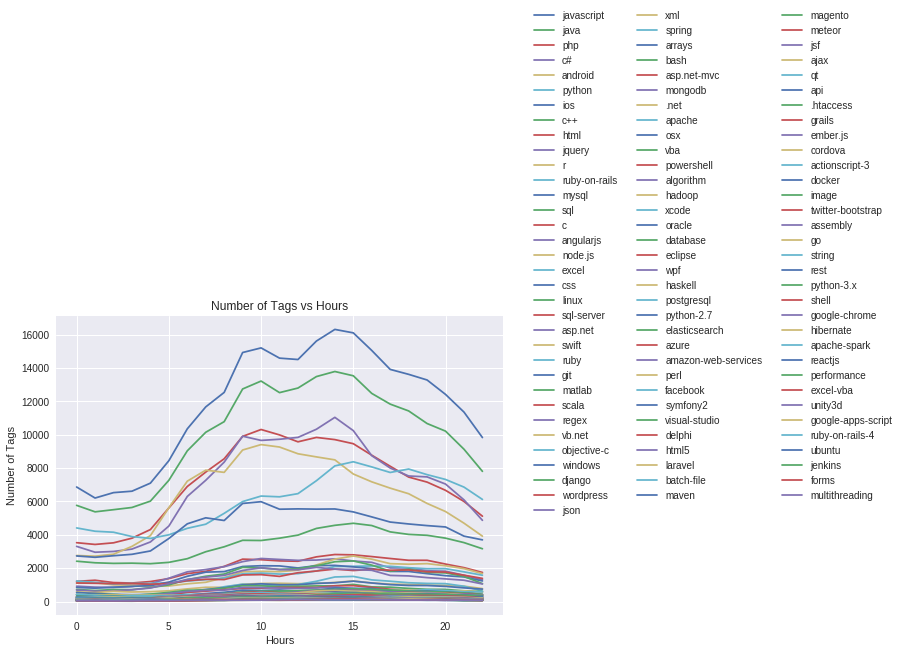

In [80]:
import seaborn as sns 
import matplotlib.pylab as plt 

x = [i for i in range(0, 23)]
sns.set_style("darkgrid")
for i in maxDict.keys():
    plt.plot(x, newDataframe[i], label=i)
    plt.pause(0.01)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 2.05),
          ncol=3, fancybox=True, shadow=True)
plt.title("Number of Tags vs Hours")
plt.xlabel("Hours")
plt.ylabel('Number of Tags')
plt.show()

In [81]:
def strip_data_for_similarity(df, tagsDict): 
    dataDict = {}

    columnTitle = [i for i in tagsDict.keys()]
    t = [i for i in range(0,23)]
    b = np.asarray([0])

    for i in tagsDict: 
        maxCount = df[i].max()
        minCount = df[i].min()
        sumCount = df[i].sum()
        eudDis = np.sqrt(np.power((maxCount/maxCount - minCount/maxCount),2))
        d = np.array([eudDis])
        b = np.column_stack((b, d))
    df = pd.DataFrame(data=b[:,1:])
    df.columns = columnTitle
    return df ,df.iloc[0]
eucDF, eucS = strip_data_for_similarity(newDataframe, maxDict)
eucDF

,javascript,java,php,c#,android,python,ios,c++,html,jquery,...,reactjs,performance,excel-vba,unity3d,google-apps-script,ruby-on-rails-4,ubuntu,jenkins,forms,multithreading
0,0.619692,0.610104,0.668218,0.732392,0.71122,0.548676,0.556873,0.516411,0.606598,0.671445,...,0.651852,0.738372,0.766234,0.649254,0.711409,0.683333,0.781513,0.866667,0.806897,0.66087


In [82]:
twoLargest = eucS.nlargest(2).index
twoSmallest = eucS.nsmallest(2).index 
eucS.nlargest(2)
#eucS.nsmallest(2)

magento    0.899628
jenkins    0.866667
Name: 0, dtype: float64

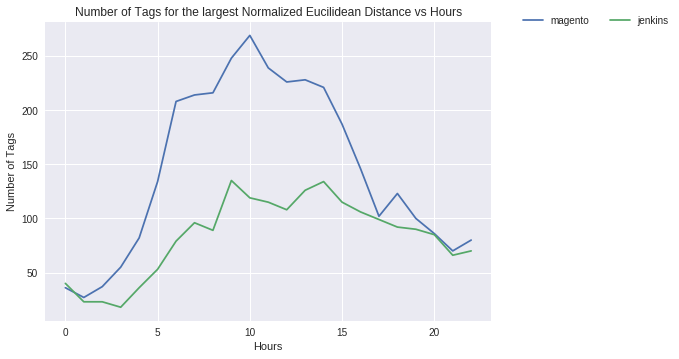

In [83]:
import seaborn as sns 
import matplotlib.pylab as plt 

x = [i for i in range(0, 23)]
sns.set_style("darkgrid")
for i in twoLargest:
    plt.plot(x, newDataframe[i], label=i)
    plt.pause(0.01)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title("Number of Tags for the largest Normalized Eucilidean Distance vs Hours")
plt.xlabel("Hours")
plt.ylabel('Number of Tags')
plt.show()



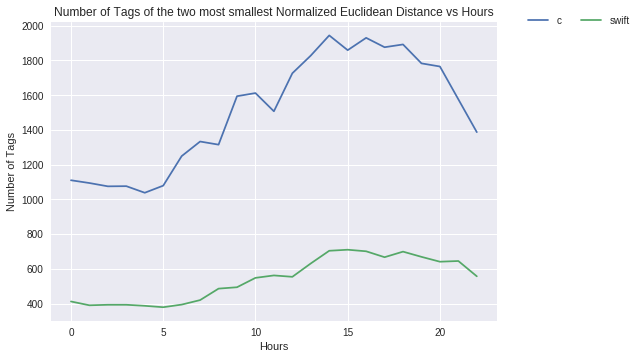

In [84]:
x = [i for i in range(0, 23)]
sns.set_style("darkgrid")
for i in twoSmallest:
    plt.plot(x, newDataframe[i], label=i)
    plt.pause(0.01)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title("Number of Tags of the two most smallest Normalized Euclidean Distance vs Hours")
plt.xlabel("Hours")
plt.ylabel('Number of Tags')
plt.show()

### Hypothesis ### 
Tags that had the greatest Euclidean distance between the most tag count and least tag count would be languages that are comonly thaught in school. And conversely, that tags that have the smallest Eucilidean distance would correspond to tags that are only used by employed developers. 

### Motivation ### 
I currently am an intern at a software engineering start up and I did a coop as a release engineering intern. The difference in the tooling and infracture that professional software engineers use and what we learn in school is shocking. When I started working as a release engineer, I had no idea what a build system were, how to manage software dependencies, and what even continuous integration meant. 

This presents an interesting oppurtunity because I am competing against other students for fairly competitive and lucrative positions. There are a whole class of software engineering positions that are in huge demand and students have no idea about, ie release engineering. I could use this data to get a competitive advantage against other engineers by building skills in things that are in demand but not taught in the class 

### Assumptions ### 
I made a few assumptions when analyzing the data. I am assuming that students and professionals work at different hours. Student post closer to the end of the day and professionals post in the middle of the day. Another, is that there is a difference between what a professional is tagging and what a student is tagging. 

### Method ### 
The data is grouped by tags, then the timestamps on each tagged was binned into 23 bins. Each bins represents a one hour time period. The number of tags in each bin was used to in calculating the euclidean distance. The hours that that had the most and least number of tags were used to calculate the euclidean distance. An important note, is that I did not used the normal euclidean distance. I actually normalized the euclidean distance by dividing the both the maximum and minimum counts by the maximum counts. I this because I wanted a fair comparision between each tag. If I didn't do that then the tags that were the most popular would have the greatest euclidean distance

### Results ### 
The data indicatest that exact opposite of my hypothesis is true. The greatest euclidean distance actually seemed to be for very professional skills like jenksins. The graph of the tags counts of the times seem to verefiy that. There were peaks at around 10 - 12 and very low number of tags in the middle of the night. This indicates that people at work were using it. The opposite was true for the skills that students used, I attribute that to the fact that college students only have class like 2 hours a day and have terrible schedules.  

Choose a different distance/similarity metric and repeat the same time series analysis. Compare the two different metrics you used. **(10 pts)**

In [128]:
from sklearn.neighbors import DistanceMetric
def strip_data_for_similarity_hamming(df, tagsDict): 
    dataDict = {}

    columnTitle = [i for i in tagsDict.keys()]
    t = [i for i in range(0,23)]
    b = np.asarray([0])
    dist = DistanceMetric.get_metric('manhattan')
    for i in tagsDict:
        t = df[i].values.tolist()
        rt = [i for i in reversed(t)]
        tem = [t, rt]
        d1 = dist.pairwise(tem)
        hamming = np.amax(d1)
        d = np.array([hamming])
        b = np.column_stack((b, d))
    df = pd.DataFrame(data=b[:,1:])
    df.columns = columnTitle
    return df ,df.iloc[0]

In [132]:
hammingDF, hammingS = strip_data_for_similarity_hamming(newDataframe, maxDict)
twoLargestH = hammingS.nlargest(2).index
twoSmallestH = hammingS.nsmallest(2).index 
twoSmallestH


Index(['shell', 'unity3d'], dtype='object')

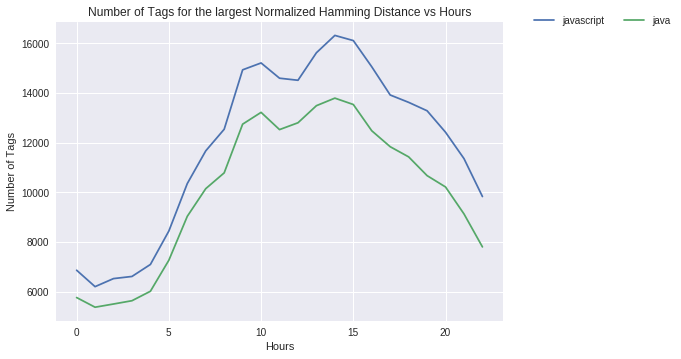

In [130]:
import seaborn as sns 
import matplotlib.pylab as plt 

x = [i for i in range(0, 23)]
sns.set_style("darkgrid")
for i in twoLargestH:
    plt.plot(x, newDataframe[i], label=i)
    plt.pause(0.01)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title("Number of Tags for the largest Hamming Distance vs Hours")
plt.xlabel("Hours")
plt.ylabel('Number of Tags')
plt.show()

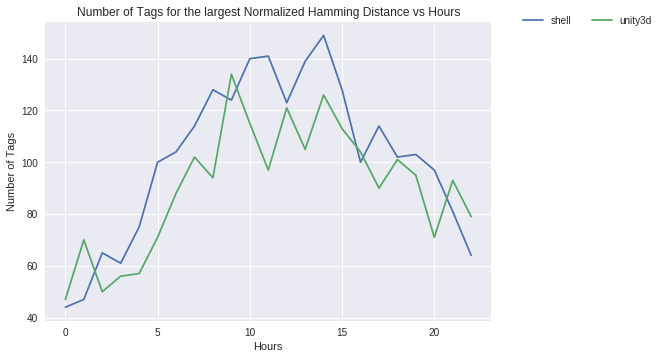

In [131]:
import seaborn as sns 
import matplotlib.pylab as plt 

x = [i for i in range(0, 23)]
sns.set_style("darkgrid")
for i in twoSmallestH:
    plt.plot(x, newDataframe[i], label=i)
    plt.pause(0.01)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title("Number of Tags for the smallest Hamming Distance vs Hours")
plt.xlabel("Hours")
plt.ylabel('Number of Tags')
plt.show()

For this I compared the hamming distance between the hours and reversed hours in the hope that I would be able to identify which tags students were more likely to use. By using the hamming distance of the reverse hours and hours, I should be able to identify which tags are used by students  late at night. I got java and javascript, which makes sense because students love coffee. 